# Rede Neural - Classificação Binária (Aprendizado Supervisionado)

### Autores: 
#### Davy Pedro Moreira de Moura
#### Tales Nobre Leite Dias de Oliveira


## Introdução: 

### Esse projeto tem como objetivo resolver um problema de classificação binária, através da implementação de uma Rede Neural Artificial.

### Métodos Numéricos aplicados:

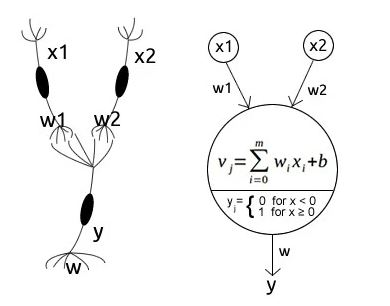

### Conforme ilustrado acima, o método usado foi o método de classificação binária através de um neurônio artificial inspirado em um neurônio biológico.

### A fórmula geral descreve as 2 entradas de valores denominadas x1 e x2 e sua respectiva saída, denominada por y, onde a saíde é o dado a ser classificado pelo neurônio artificial. Este método denomina-se Aprendizado Supervisionado, pois em seu método há uma saída, onde esta saída representa características determinadas antes da sua classificação. Este método, por sua vez, se opõe ao Aprendizado Não Supervisionado, onde há apenas entradas e o neurônio deve determinar suas saídas, representadas por y, de forma categorizada baseada apenas nas duas ou nas múltiplas entradas (w1, w2... wn).

# Código:

## 1 - Importação de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## 2 - Carregando Dados

In [2]:
dado = "alc28_2_classes.txt"

df = pd.read_csv(dado, sep= " ", header=None)
df.columns = ["x1", "x2", "y"]

df.head()

,x1,x2,y
0,-0.22,-1.15,0.0
1,-0.50,-0.84,0.0
2,-0.19,-0.72,0.0
3,-0.14,-0.78,0.0
4,-0.35,-0.99,0.0


## 3 - Tipo dos Dados

### 3.1 - Conforme evidência, os dados estão no formato float

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
 2   y       1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


## 4 - Processamento dos Dados: Transformação dos dados em matriz 

In [4]:
array = df.values
array

array([[-0.22, -1.15,  0.  ],
       [-0.5 , -0.84,  0.  ],
       [-0.19, -0.72,  0.  ],
       ...,
       [ 0.4 ,  1.23,  1.  ],
       [ 0.72,  0.22,  1.  ],
       [ 0.46,  0.72,  1.  ]])

## 5 - Representação das variáveis X1, X2 e y

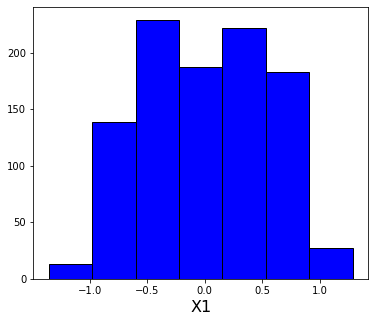

In [5]:
fig, ax = plt.subplots(figsize=(6,5))
ax.hist(df['x1'], bins=7, color='blue', edgecolor='black')
plt.xlabel("X1", fontsize=16)
plt.savefig("v1.png")

plt.show()

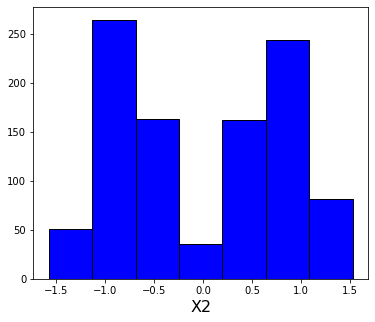

In [6]:
fig, ax = plt.subplots(figsize=(6,5))
ax.hist(df['x2'], bins=7, color='blue', edgecolor='black')
plt.xlabel("X2", fontsize=16)
plt.savefig("v2.png")

plt.show()

### 5.1 - Conforme vemos no gráfico abaixo, a saída, que é representada por y, tem comportamento binário (exibe 0 ou 1)

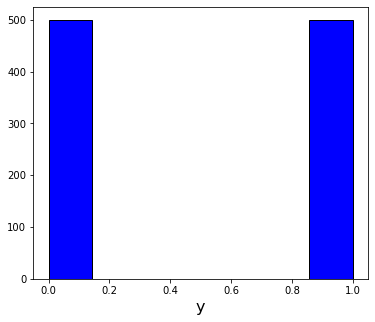

In [7]:
fig, ax = plt.subplots(figsize=(6,5))
ax.hist(df['y'], bins=7, color='blue', edgecolor='black')
plt.xlabel("y", fontsize=16)
plt.savefig("y.png")

plt.show()

## 6 - Separando as Entradas (X1, X2) e a Saída (y)

### 6.1 - Separando as Entradas em uma matriz

In [8]:
X = array[:,0:2]
X

array([[-0.22, -1.15],
       [-0.5 , -0.84],
       [-0.19, -0.72],
       ...,
       [ 0.4 ,  1.23],
       [ 0.72,  0.22],
       [ 0.46,  0.72]])

### 6.2 - Separando a Saída em uma matriz unidimensional

In [9]:
y = array[:,2]
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

## 7 - Gráfico de dispersão dos pontos, indicando sua classificação pelas cores azul e vermelho

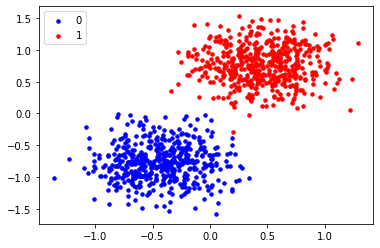

In [10]:
plt.scatter(X[y == 0,0], X[y == 0,1], c = 'blue', s=12, label=0)
plt.scatter(X[y == 1,0], X[y == 1,1], c = 'red', s=12, label=1)
plt.legend(loc='upper left')

## 8 - Treinamento do Neurônio Elementar

In [11]:
test_group_size = 0.2

seed = 6

In [12]:
X_train, X_validation, y_train, y_validation =\
model_selection.train_test_split(X, y, test_size = test_group_size, random_state = seed)

## 9 - Gráfico de Dispersão com redução dos pontos após o treino

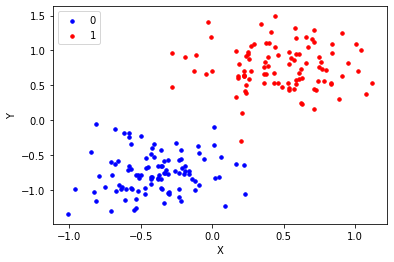

In [13]:
plt.scatter(X_validation[y_validation == 0, 0], X_validation[y_validation == 0, 1], c = 'blue', s=12, label = '0')
plt.scatter(X_validation[y_validation == 1, 0], X_validation[y_validation == 1, 1], c = 'red', s=12, label = '1')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='upper left')

## 10 - Aplicando o modelo preditivo

In [14]:
model = KNeighborsClassifier(n_neighbors = 3)

clf = model.fit(X_train, y_train)

predictions = model.predict(X_validation)

print(accuracy_score(y_validation, predictions))

print(confusion_matrix(y_validation, predictions))

0.995
[[102   0]
 [  1  97]]


## 11 - Teste de Classificação

In [15]:
x1 = 0.46
x2 = 0.84

classe = model.predict([[x1, x2]])
print('Classificação =', classe)

Classificação = [1.]


## Resultados Obtidos:

### A partir do gráfico de dispersão que se encontra no tópico 7, temos um dado visual de natureza agregada e bem sedimentada, indicando que não há a presença de ruídos no dado. Isso fica mais evidente ao obsevarmos o gráfico 9, onde utilizamos o método de teste com separação dos dados, que está dividido pelas cores azul e vermelha. Se, ao traçar uma reta neste gráfico, temos, portanto, um gráfico com um comportamento linear, onde este, mais uma vez, comprova a que a natureza do dado disponibilizado tem um comportamento com baixo ruído, se opondo ao modelo Não-Linear, que em termos computacionais é mais custoso em termos de performance e apresenta um comportamento desordenado.